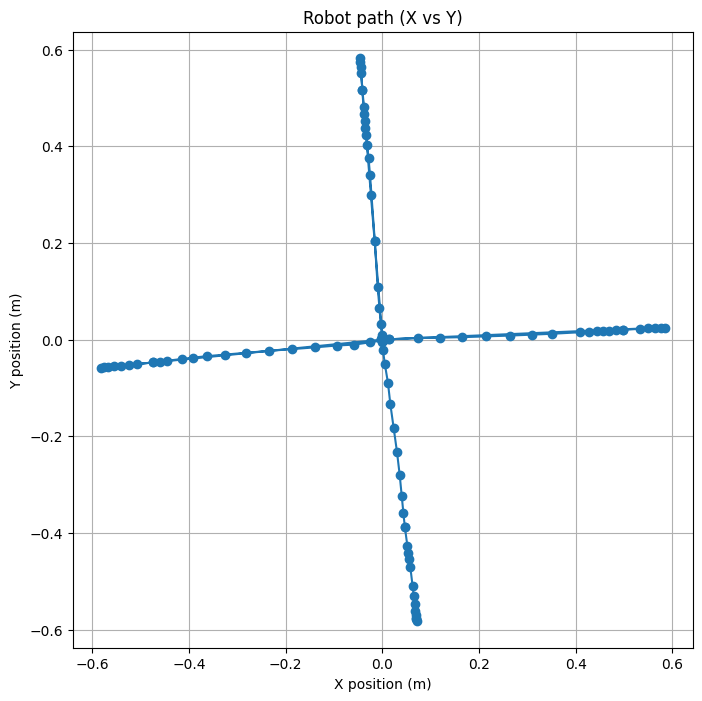

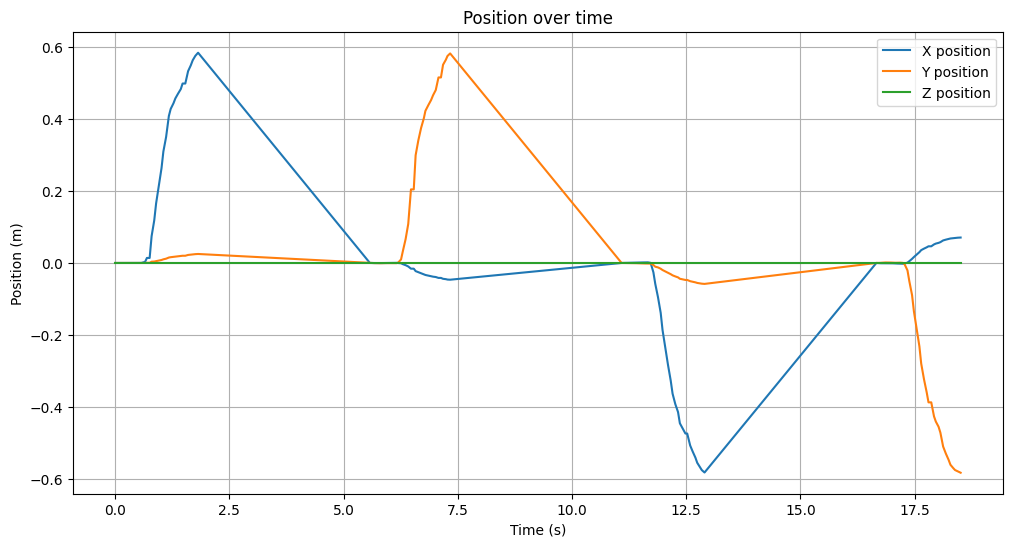

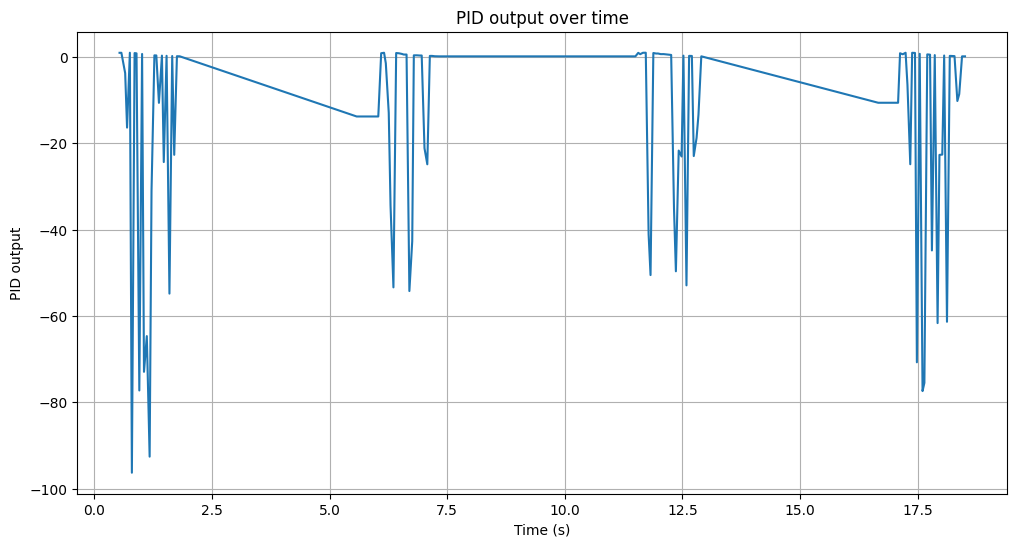

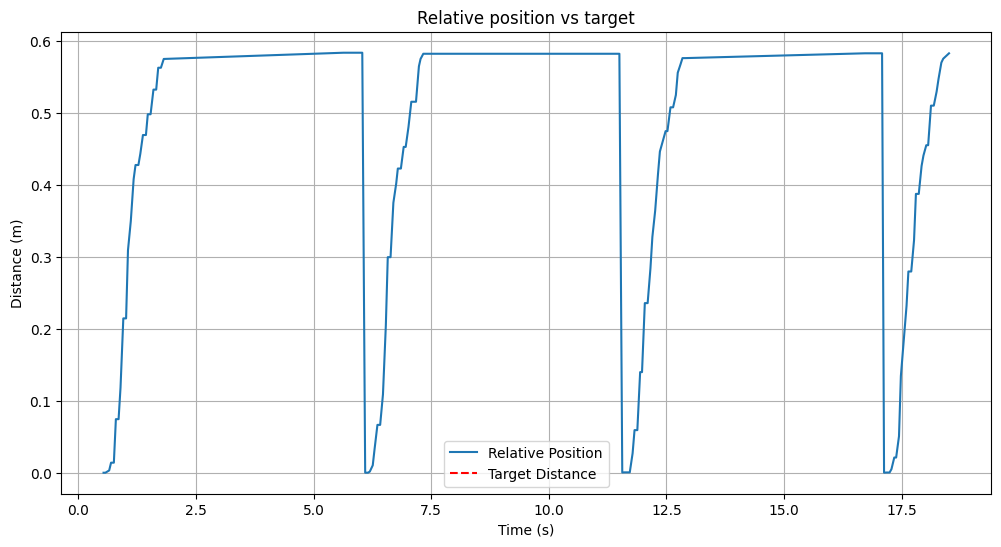

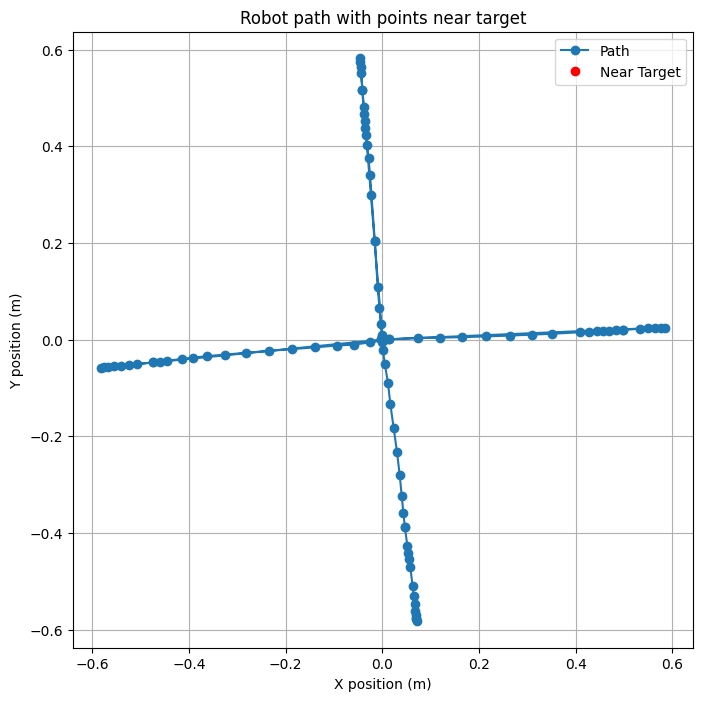

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("./robot_log_15_55_34_P1-6_I0-3_D3.csv")

# แปลง timestamp ให้อ่านง่าย (เป็นวินาทีเริ่มต้น)
start_time = df['time'].iloc[0]
df['time_sec'] = df['time'] - start_time

# Plot 1: กราฟ XY แสดงเส้นทางหุ่น (ตำแหน่ง x,y)
plt.figure(figsize=(8,8))
plt.plot(df['x'], df['y'], marker='o', linestyle='-')
plt.title('Robot path (X vs Y)')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.grid(True)
plt.axis('equal')  # ทำให้สเกล x,y เท่ากันเพื่อดูรูปทรง
plt.show()

# Plot 2: กราฟตำแหน่ง x, y, z ตามเวลา
plt.figure(figsize=(12,6))
plt.plot(df['time_sec'], df['x'], label='X position')
plt.plot(df['time_sec'], df['y'], label='Y position')
plt.plot(df['time_sec'], df['z'], label='Z position')
plt.title('Position over time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: กราฟ PID output ตามเวลา
plt.figure(figsize=(12,6))
plt.plot(df['time_sec'], df['pid_output'], label='PID Output')
plt.title('PID output over time')
plt.xlabel('Time (s)')
plt.ylabel('PID output')
plt.grid(True)
plt.show()

# Plot 4: กราฟระยะห่าง relative_position กับ target_distance
plt.figure(figsize=(12,6))
plt.plot(df['time_sec'], df['relative_position'], label='Relative Position')
plt.axhline(y=df['target_distance'].iloc[0], color='r', linestyle='--', label='Target Distance')
plt.title('Relative position vs target')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 5: พล็อต XY แยกเป็นจุดเฉพาะช่วงที่ relative_position เข้าใกล้ target (±0.02m)
target = df['target_distance'].iloc[0]
close_to_target = df[(df['relative_position'] >= target - 0.02) & (df['relative_position'] <= target + 0.02)]

plt.figure(figsize=(8,8))
plt.plot(df['x'], df['y'], 'o-', label='Path')
plt.plot(close_to_target['x'], close_to_target['y'], 'ro', label='Near Target')
plt.title('Robot path with points near target')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
